# Project Assignment
### To Find out the best two weeks of weather in 2014 to have in a capital of BRICS country.
### NOTE: BRICS is an acronym for Brazil, Russia, China, and South Africa.

### First is get the data stored in London_2014.csv, convert it to dataframe and analyse it.

In [1]:
from pandas import *
brics = read_csv('London_2014.csv', skipinitialspace=True)

# Data Cleaning
### the .CSV file usually requires cleaning due to Comma Separations and HTML line Breaks that are auto inserted.

In [2]:
brics.columns

Index(['GMT', 'Max TemperatureC', 'Mean TemperatureC', 'Min TemperatureC',
       'Dew PointC', 'MeanDew PointC', 'Min DewpointC', 'Max Humidity',
       'Mean Humidity', 'Min Humidity', 'Max Sea Level PressurehPa',
       'Mean Sea Level PressurehPa', 'Min Sea Level PressurehPa',
       'Max VisibilityKm', 'Mean VisibilityKm', 'Min VisibilitykM',
       'Max Wind SpeedKm/h', 'Mean Wind SpeedKm/h', 'Max Gust SpeedKm/h',
       'Precipitationmm', 'CloudCover', 'Events', 'WindDirDegrees<br />'],
      dtype='object')

In [4]:
#WindDirDegrees is attached with <br /> and needs to be cleaned.
brics = brics.rename(columns={'WindDirDegrees<br />' : 'WindDirDegrees'})

In [5]:
brics['WindDirDegrees'] = brics['WindDirDegrees'].str.rstrip('<br />')

In [6]:
#next is to convert WindDirDegree to Float24
brics['WindDirDegrees'] = brics['WindDirDegrees'].astype('float64') 

In [7]:
# We also have to Change the value in GMT for datetime so that we can usu it for this purpose.
brics['GMT'] = to_datetime(brics['GMT'])

In [8]:
# Lets change the index from the default to the datetime64 values in the 'GMT' column to enable us Plot values easily.
brics.index = brics['GMT']

# Finding the Best Holiday Period
#To me, the Best holiday is the one with low sun and No rain at all. No one likes a messy holiday with rain. Such weather usually has a mean temprature of 36 or higher.

In [10]:
brics[brics['Mean TemperatureC'] >= 36]

,GMT,Max TemperatureC,Mean TemperatureC,Min TemperatureC,Dew PointC,MeanDew PointC,Min DewpointC,Max Humidity,Mean Humidity,Min Humidity,...,Max VisibilityKm,Mean VisibilityKm,Min VisibilitykM,Max Wind SpeedKm/h,Mean Wind SpeedKm/h,Max Gust SpeedKm/h,Precipitationmm,CloudCover,Events,WindDirDegrees
GMT,,,,,,,,,,,,,,,,,,,,,


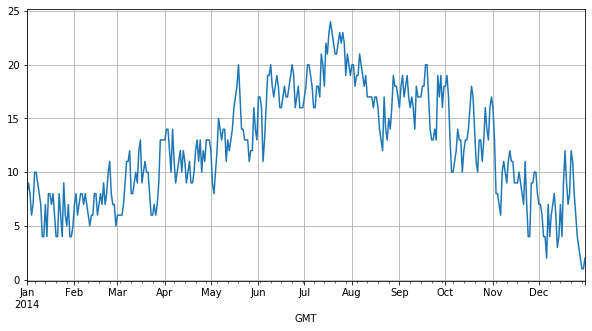

In [11]:
#WAO!, no such Temperature. so Am going to plot a graph to see the Temperatures avaialble or I check the Maximun and average of the temperature column. Let me Plot Graph and see.
brics['Mean TemperatureC'].plot(grid=True, figsize=(10,5))

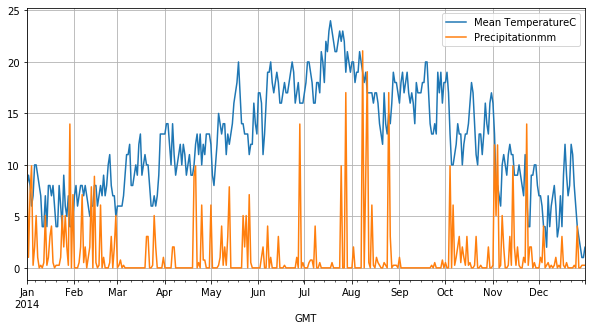

In [13]:
# Hmmm! So i will take between 15 and 24 degrees, which fall between May and November. But June to September are usually rainy. Anyway lets Factor in Rainfalls and chacek the graph again.
brics[['Mean TemperatureC', 'Precipitationmm']].plot(grid=True, figsize=(10,5))


In [21]:
#Wao! between september and October There is No Rain and the Temperature is High enough to warm the Weather. So, nest is to know the exact dates that fits this condition in September.

In [26]:
from datetime import datetime
Holiday = brics.loc[datetime(2014,9,1) : datetime(2014,9,30)]

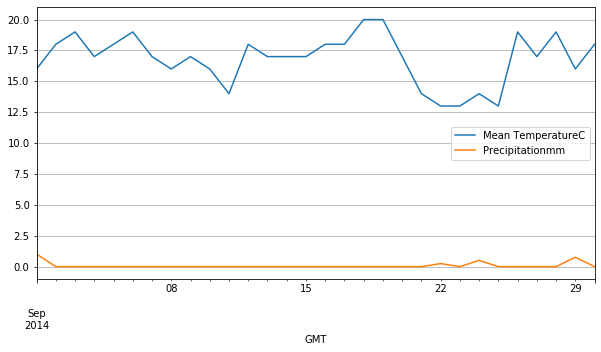

In [27]:
Holiday[['Mean TemperatureC', 'Precipitationmm']].plot(grid=True, figsize=(10,5))

# Conclusion
From the Graph, The best Two Weeks for the Holiday is September 3rd to september 17th.